In [25]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [26]:
# load data set
# shuffle dataset
# split training 70 validation 10 and test 20 %
# split inputs and labels (output)
# one hot coding
# fit model without validation compare training and testing acuracies
# fit mode with validation (with history)
# create graph 
# adjust epoch pased on graph 
# check testing and training accuracies are matched or not
# (chapter 3: Listing  3:17,3:18,3:19,3:20)

In [27]:
dataset = pd.read_csv('sonar.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [28]:

dataset=shuffle(dataset)
dataset = np.array(dataset)

In [29]:
train_d = dataset[:145,:60].astype('float')
train_l = dataset[:145,60:61]

train_v = dataset[146:165,:60].astype('float')
train_v_l= dataset[146:165,60:61]

test_d  = dataset[166:,:60].astype('float')
test_l = dataset[166:,60:61]
test_d

array([[0.0635, 0.0709, 0.0453, ..., 0.0085, 0.004 , 0.0051],
       [0.0225, 0.0019, 0.0075, ..., 0.0035, 0.0021, 0.0027],
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       ...,
       [0.0216, 0.0215, 0.0273, ..., 0.0024, 0.0009, 0.0017],
       [0.0181, 0.0146, 0.0026, ..., 0.0048, 0.0089, 0.0085],
       [0.0411, 0.0277, 0.0604, ..., 0.005 , 0.0085, 0.0044]])

In [30]:
train_d

array([[0.019 , 0.0038, 0.0642, ..., 0.0022, 0.0055, 0.0122],
       [0.0179, 0.0136, 0.0408, ..., 0.0155, 0.016 , 0.0085],
       [0.1083, 0.107 , 0.0257, ..., 0.0122, 0.0082, 0.0143],
       ...,
       [0.0715, 0.0849, 0.0587, ..., 0.0099, 0.0083, 0.0124],
       [0.0189, 0.0308, 0.0197, ..., 0.0092, 0.0052, 0.0075],
       [0.0096, 0.0404, 0.0682, ..., 0.0036, 0.0043, 0.0018]])

In [31]:


encoder = LabelEncoder()
encoder.fit(dataset[:,60:61])

y_train = encoder.transform(train_l)
y_train_v = encoder.transform(train_v_l)
y_test = encoder.transform(test_l)



In [32]:
epoch = 80
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(60,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer = 'rmsprop' ,loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(train_d,
    y_train,
    epochs=epoch,
    batch_size=8)


Train on 145 samples
Epoch 1/80
145/145 [==============================] - 1s 4ms/sample - loss: 0.6933 - accuracy: 0.5034
Epoch 2/80
145/145 [==============================] - 0s 331us/sample - loss: 0.6649 - accuracy: 0.6414
Epoch 3/80
145/145 [==============================] - 0s 345us/sample - loss: 0.6504 - accuracy: 0.6276
Epoch 4/80
145/145 [==============================] - 0s 345us/sample - loss: 0.6384 - accuracy: 0.6414
Epoch 5/80
145/145 [==============================] - 0s 331us/sample - loss: 0.6267 - accuracy: 0.6966
Epoch 6/80
145/145 [==============================] - 0s 324us/sample - loss: 0.6130 - accuracy: 0.6897
Epoch 7/80
145/145 [==============================] - 0s 338us/sample - loss: 0.6065 - accuracy: 0.6621
Epoch 8/80
145/145 [==============================] - 0s 544us/sample - loss: 0.5968 - accuracy: 0.6897
Epoch 9/80
145/145 [==============================] - 0s 351us/sample - loss: 0.5860 - accuracy: 0.7586
Epoch 10/80
145/145 [========================

Epoch 79/80
145/145 [==============================] - 0s 331us/sample - loss: 0.2571 - accuracy: 0.9103
Epoch 80/80
145/145 [==============================] - 0s 269us/sample - loss: 0.2672 - accuracy: 0.8897


In [35]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

In [36]:
history_validation = model.fit(train_d,
    y_train,
    epochs=epoch,
    batch_size=8,
    validation_data=(train_v, y_train_v))


Train on 145 samples, validate on 19 samples
Epoch 1/80
145/145 [==============================] - 0s 2ms/sample - loss: 0.2531 - accuracy: 0.8897 - val_loss: 0.4606 - val_accuracy: 0.7368
Epoch 2/80
145/145 [==============================] - 0s 420us/sample - loss: 0.2639 - accuracy: 0.9034 - val_loss: 0.4726 - val_accuracy: 0.7895
Epoch 3/80
145/145 [==============================] - 0s 393us/sample - loss: 0.2526 - accuracy: 0.9034 - val_loss: 0.5624 - val_accuracy: 0.8421
Epoch 4/80
145/145 [==============================] - 0s 420us/sample - loss: 0.2491 - accuracy: 0.9034 - val_loss: 0.5372 - val_accuracy: 0.8421
Epoch 5/80
145/145 [==============================] - 0s 393us/sample - loss: 0.2456 - accuracy: 0.8966 - val_loss: 0.5291 - val_accuracy: 0.8421
Epoch 6/80
145/145 [==============================] - 0s 441us/sample - loss: 0.2449 - accuracy: 0.8966 - val_loss: 0.5522 - val_accuracy: 0.8421
Epoch 7/80
145/145 [==============================] - 0s 427us/sample - loss: 0.2

145/145 [==============================] - 0s 386us/sample - loss: 0.1589 - accuracy: 0.9379 - val_loss: 0.6721 - val_accuracy: 0.7895
Epoch 57/80
145/145 [==============================] - 0s 379us/sample - loss: 0.1467 - accuracy: 0.9586 - val_loss: 0.7063 - val_accuracy: 0.7895
Epoch 58/80
145/145 [==============================] - 0s 379us/sample - loss: 0.1567 - accuracy: 0.9517 - val_loss: 0.6741 - val_accuracy: 0.7895
Epoch 59/80
145/145 [==============================] - 0s 345us/sample - loss: 0.1482 - accuracy: 0.9655 - val_loss: 0.6887 - val_accuracy: 0.7895
Epoch 60/80
145/145 [==============================] - 0s 352us/sample - loss: 0.1438 - accuracy: 0.9724 - val_loss: 0.8144 - val_accuracy: 0.7368
Epoch 61/80
145/145 [==============================] - 0s 358us/sample - loss: 0.1461 - accuracy: 0.9448 - val_loss: 0.6936 - val_accuracy: 0.7895
Epoch 62/80
145/145 [==============================] - 0s 379us/sample - loss: 0.1436 - accuracy: 0.9517 - val_loss: 0.7186 - val_

In [37]:
history_dict_v = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

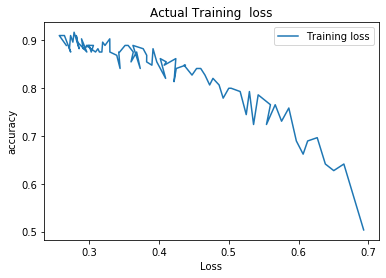

In [38]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
accuracy = history_dict['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Actual Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

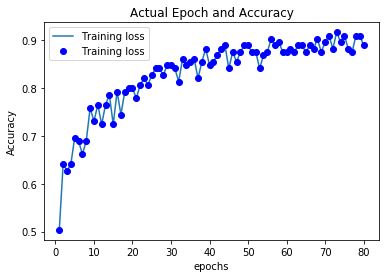

In [39]:

loss = history_dict['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict['accuracy']
accuracyv = history_dict_v['accuracy']
plt.plot(epochs,accuracyv, label='Training loss')
plt.plot(epochs,accuracy,'bo', label='Training loss')
plt.title('Actual Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

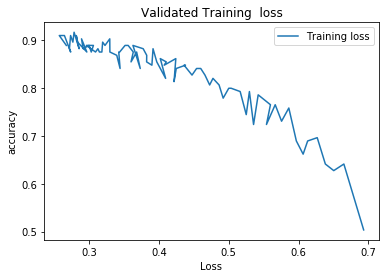

In [40]:
loss = history_dict_v['loss']
accuracy = history_dict_v['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Validated Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

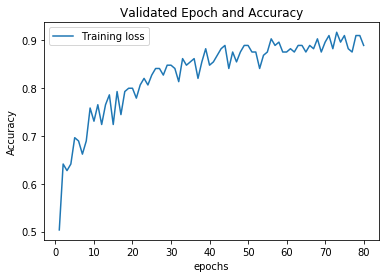

In [41]:
loss = history_dict_v['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict_v['accuracy']
plt.plot(epochs,accuracy, label='Training loss')
plt.title('Validated Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [42]:
results = model.evaluate(test_d, y_test)

42/42 [==============================] - 0s 167us/sample - loss: 0.3729 - accuracy: 0.9286


In [43]:
results = model.evaluate(test_d, y_test)

42/42 [==============================] - 0s 143us/sample - loss: 0.3729 - accuracy: 0.9286


# K foam validation

In [44]:
dataset=shuffle(dataset)
dataset = np.array(dataset)

In [45]:
train_d = dataset[:165,:60].astype('float')
train_l = dataset[:165,60:61]


test_d  = dataset[166:,:60].astype('float')
test_l = dataset[166:,60:61]
test_d

array([[0.0189, 0.0308, 0.0197, ..., 0.0092, 0.0052, 0.0075],
       [0.0491, 0.0279, 0.0592, ..., 0.014 , 0.0332, 0.0439],
       [0.0096, 0.0404, 0.0682, ..., 0.0036, 0.0043, 0.0018],
       ...,
       [0.0126, 0.0149, 0.0641, ..., 0.0094, 0.0116, 0.0063],
       [0.0333, 0.0221, 0.027 , ..., 0.0132, 0.0051, 0.0041],
       [0.0176, 0.0172, 0.0501, ..., 0.0179, 0.0294, 0.0063]])

In [46]:
encoder = LabelEncoder()
encoder.fit(dataset[:,60:61])
y_train = encoder.transform(train_l)
y_test = encoder.transform(test_l)

In [47]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_d.shape[1],))) # number of features (13) are used as vector in input shape
  model.add(layers.Dense(32, activation = 'relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer = 'rmsprop' ,loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
k = 4
num_val_samples = len(train_d) // 4
num_epochs = 50
all_acc = []
all_loss = []
for i in range(k):
  print('processing fold # ', i)
  # prepare the validation data: data from partition # k
  val_data = train_d[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  
  # prepare the training data: data from data - k
  partial_train_data = np.concatenate(                    
      [train_d[:i * num_val_samples],
      train_d[(i + 1 ) * num_val_samples:]],
  axis = 0)
  partial_train_targets = np.concatenate(
      [y_train[:i * num_val_samples],
      y_train[(i + 1 ) * num_val_samples:]],
  axis = 0)
  # Build the Keras Models (already commpiled)
  model = build_model()
  # Train the model (in silence mode, verbose = 0)
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 1)
  # Evaluate the model on the validation data
  hist = model.evaluate(val_data, val_targets, verbose = 0)
  all_acc.append(accuracy)
  all_loss.append(loss)

processing fold #  0
Train on 124 samples
Epoch 1/50
124/124 [==============================] - 1s 7ms/sample - loss: 0.6733 - accuracy: 0.5565
Epoch 2/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.6127 - accuracy: 0.6613
Epoch 3/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.5537 - accuracy: 0.7500
Epoch 4/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.5088 - accuracy: 0.7258
Epoch 5/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.4767 - accuracy: 0.7742
Epoch 6/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.4303 - accuracy: 0.8065
Epoch 7/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.4194 - accuracy: 0.7661
Epoch 8/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.3908 - accuracy: 0.8468
Epoch 9/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.3583 - accuracy: 0.8145
Epoch 10/50
124/124 [===================

124/124 [==============================] - 0s 3ms/sample - loss: 0.2298 - accuracy: 0.9194
Epoch 30/50
124/124 [==============================] - 0s 3ms/sample - loss: 0.2166 - accuracy: 0.9113
Epoch 31/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.2150 - accuracy: 0.8871
Epoch 32/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.2160 - accuracy: 0.9113
Epoch 33/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.1994 - accuracy: 0.93550s - loss: 0.1496 - accuracy: 
Epoch 34/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.1874 - accuracy: 0.9113
Epoch 35/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.1736 - accuracy: 0.9194
Epoch 36/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.1866 - accuracy: 0.9274
Epoch 37/50
124/124 [==============================] - 0s 2ms/sample - loss: 0.1907 - accuracy: 0.93550s - loss: 0.2335 - accuracy
Epoch 38/50
124/124 [======

In [ ]:
display(np.mean(all_acc))
display(np.mean(all_loss))

hist[1]


In [ ]:
acc = [np.mean([x[i] for x in all_acc]) for i in range(num_epochs)]

# display(average_mae_history)
plt.plot(range(1, len(average_mae_history)+1 ),acc, label='Accuracy')
plt.title('Accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


In [ ]:
loss = [np.mean([x[i] for x in all_loss]) for i in range(num_epochs)]
# display(average_mae_history)
plt.plot(range(1, len(average_mae_history)+1 ), loss, label='Loss')
plt.title('Loss and Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')